In [5]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

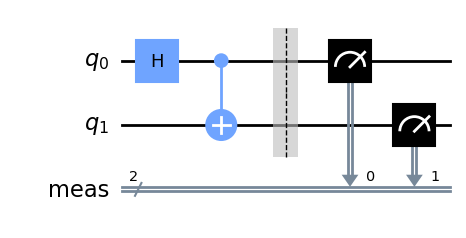

In [6]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw(output='mpl')

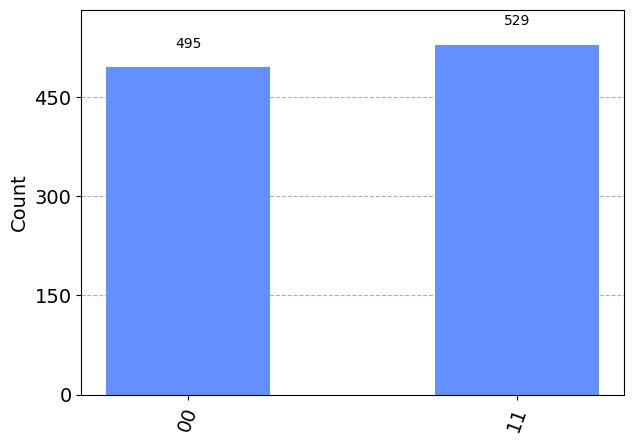

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts())

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor
IBMQ.save_account('')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2023-09-09 23:51:57,144: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-09-09 23:51:57,401: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
# qcomp = provider.get_backend('ibmq_qasm_simulator')
qcomp = provider.get_backend('ibm_nairobi')
job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


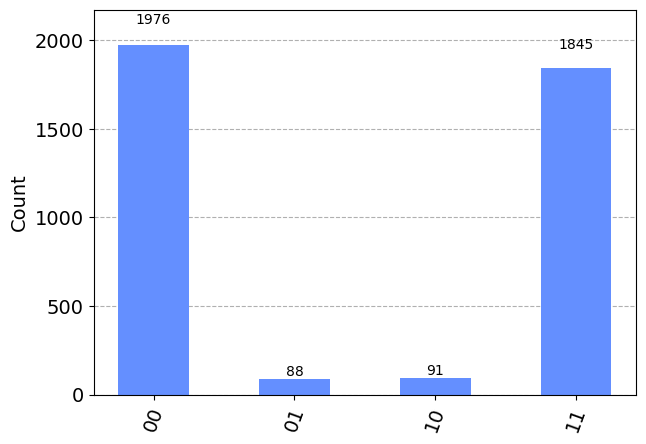

In [13]:
qcomp_result = job.result()
plot_histogram(qcomp_result.get_counts())